<a href="https://colab.research.google.com/github/Ra00f1/Machine-Learning-and-Deep-Learning-notes/blob/main/Breast_Cancer_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# **Breast Cancer Dataset**

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

print(X.shape)
print(y.shape)

print(data.feature_names)
print(data.target_names)

print(type(X))
X_df = pd.DataFrame(X, columns=data.feature_names)
X_df.info()
X_df.head()


# y_df = pd.DataFrame(y, columns=['target'])
# y_df.head()

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   m

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Logistic Regression**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model
input_dim = X.shape[1]
model = LogisticRegressionModel(input_dim)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_preds = (y_pred_probs > 0.5).float()

    acc = accuracy_score(y_test_tensor, y_preds)
    print(f"\nTest Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_tensor, y_preds))

Epoch 10/100, Loss: 0.6128
Epoch 20/100, Loss: 0.5049
Epoch 30/100, Loss: 0.4366
Epoch 40/100, Loss: 0.3893
Epoch 50/100, Loss: 0.3545
Epoch 60/100, Loss: 0.3276
Epoch 70/100, Loss: 0.3061
Epoch 80/100, Loss: 0.2885
Epoch 90/100, Loss: 0.2737
Epoch 100/100, Loss: 0.2612

Test Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# **Gradient Descent**
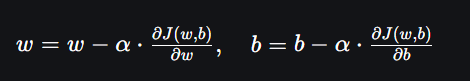

In [ ]:
x = np.random.randn(10,1)
y = 5*X + np.random.rand()
#   w      b

print(X)
print(y)

# parameters
w = 0.0
b = 0.0
ws = []
bs = []
losses = []
yhats = []

# Hyperparameter
learning_rate = 0.1

# Gradient Descent
def gradient_descent(x, y, w, b, learning_rate):
  dl_dw = 0.0
  dl_db = 0.0
  N = x.shape[0]

  # loss = (y-(wx+b))**2

  for xi, yi, in zip(x,y):
    dl_dw += -2*xi*(yi-(w*xi + b))
    dl_db += -2*(yi-(w*xi + b))

  w = w - learning_rate*(1/N) * dl_dw
  b = b - learning_rate*(1/N) * dl_db

  return w, b

# Iteration
for epoch in range(100):
  w, b = gradient_descent(X,y,w,b,learning_rate)
  yhat = w*x + b
  loss = np.divide(np.sum((y - yhat)**2, axis = 0), x.shape[0])
  ws.append(w)
  bs.append(b)
  losses.append(loss)
  yhats.append(yhat)
  print(f'{epoch} loss is {loss}, parameters w: {w}, b={b}')


[[ 0.92204339]
 [-0.0125573 ]
 [-0.61821037]
 [ 0.07864796]
 [-0.11430902]
 [-1.52470644]
 [-0.50760736]
 [-1.46483389]
 [ 0.6498414 ]
 [ 0.54675884]]
[[ 5.29462103]
 [ 0.62161761]
 [-2.40664777]
 [ 1.07764387]
 [ 0.11285899]
 [-6.93912813]
 [-1.85363274]
 [-6.63976537]
 [ 3.93361106]
 [ 3.4181983 ]]
0 loss is [14.76081636], parameters w: [0.64212181], b=[-0.06761246]
1 loss is [14.87189442], parameters w: [1.19541953], b=[-0.09544051]
2 loss is [15.69407515], parameters w: [1.67342471], b=[-0.09507382]
3 loss is [16.92595685], parameters w: [2.0873814], b=[-0.0752307]
4 loss is [18.37106448], parameters w: [2.44667008], b=[-0.04242593]
5 loss is [19.9022963], parameters w: [2.75914764], b=[-0.00148769]
6 loss is [21.43858693], parameters w: [3.03142045], b=[0.04404282]
7 loss is [22.92949275], parameters w: [3.26906469], b=[0.09160281]
8 loss is [24.34494784], parameters w: [3.47680437], b=[0.13937014]
9 loss is [25.66841677], parameters w: [3.65865586], b=[0.18608028]
10 loss is [26.

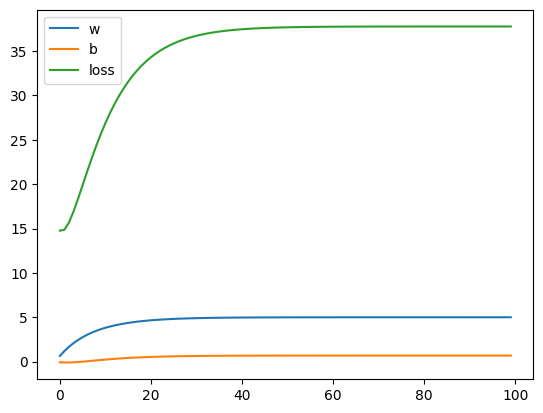

In [ ]:
# plot the w and b and show how gradient descent change over the epochs and also loss
import matplotlib.pyplot as plt

plt.plot(ws, label='w')
plt.plot(bs, label='b')
plt.plot(losses, label='loss')
plt.legend()
plt.show()